# Using SQL with Pandas - Lab

## Introduction

In this lab, you'll practice using sql statements and the .query() method provided by pandas to manipulate datasets.

## Objectives

You will be able to:

* Query DataFrames with SQL using the `pandasql` library
* Query DataFrames by slicing with conditional logic
* Use the query method to access data

## The Dataset

In this lab, we'll continue working with the _Titanic Survivors_ Dataset

Begin by importing `pandas` as `pd`, `numpy` as `np`, and `matplotlib.pyplot` as `plt`, and set the appropriate alias for each. Additionally, set `%matplotlib inline`.

In [2]:
#!pip install pandasql

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import sqldf


  Running setup.py bdist_wheel for pandasql ... done
  Stored in directory: /home/whimsical-accelerator-4840/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql
You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Next, read in the data from `titanic.csv` and store it as a DataFrame in `df`. Display the `.head()` to ensure that everything loaded correctly.

In [70]:
df = pd.read_csv("titanic.csv")

# pysqldf = lambda q: sqldf(q, globals())
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Slicing DataFrames Using Conditional Logic

One of the most common ways to query data with pandas is to simply slice the DataFrame so that the object returned contains only the data you're interested in.  

In the cell below, slice the DataFrame so that it only contains passengers with 2nd or 3rd class tickets (denoted by the `Pclass` column). 

**_Hint_**: Remember, your conditional logic must be passed into the slicing operator to return a slice of the DataFrame--otherwise, it will just return a table of boolean values based on the conditional statement!

In [21]:
no_first_class_df = df[df.Pclass.isin(['2','3'])]
no_first_class_df.head()

891

We can also chain conditional statements together by wrapping them in parenthesis and making use of the `&` and `|` operators ('and' and 'or' operators, respectively).

In the cell below, slice the DataFrame so that it only contains passengers with a `Fare` value between 50 and 100, inclusive.  

In [5]:
# fares_50_to_100_df = df[(df.Fare > 50) & (df.Fare < 100)]
fares_50_to_100_df = df.query("Fare >= 50 & Fare <= 100")
fares_50_to_100_df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
34,34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
35,35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
52,52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
61,61,62,1,?,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
62,62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
72,72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S


Remember that there are two syntactically correct ways to access a column in a DataFrame.  For instance, `df['Name']` and `df.Name` return the same thing.  

In the cell below, use the dot notation syntax and slice a DataFrame that contains male passengers that survived that also belong to Pclass 2 or 3.

In [6]:
poor_male_survivors_df = df[df.Pclass.isin(['2','3']) & 
                            (df.Survived == 1) & 
                            (df.Sex == 'male')
                           ]
poor_male_survivors_df

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
36,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
65,65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C
74,74,75,1,3,"Bing, Mr. Lee",male,32.00,0,0,1601,56.4958,NaN,S
78,78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
81,81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.00,0,0,345779,9.5000,NaN,S
107,107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
125,125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,NaN,C
127,127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.00,0,0,C 17369,7.1417,NaN,S


Great! Now that you've reviewed the methods for slicing a DataFrame for querying our data, let's explore a sample use case.  


## Practical Example: Slicing DataFrames

In this section, you're looking to investigate whether women and children survived more than men, or that rich passengers were more likely to survive than poor passengers.  The easiest way to confirm this is to slice the data into DataFrames that contain each subgroup, and then quickly visualize the survival rate of each subgroup with histograms.

In the cell below, create a DataFrame that contains passengers that are female, as well as children (males included) under the age of 15 (exclusive).   

Additionally, create a DataFrame that contains only male passengers of all ages.  

In [27]:
women_and_children_df = df.query("Sex == 'female' | Age < 15")
male_all_ages_df = df[df.Sex == 'male']
male_survived = male_all_ages_df['Survived']

Great! Now, you can use the `matplotlib` functionality built into the DataFrame objects to quickly create visualizations of the `Survived` column for each DataFrame.  

In the cell below, create histogram visualizations of the `Survived` column for both DataFrames.  Bonus points if you use `plt.title()` to label them correctly and make it easy to tell them apart!

In [45]:
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
def survival(people):
    bins = np.arange(3) - 0.5
    plt.figure(figsize=(10,6))
    plt.hist(people, bins = bins)
    plt.xticks(range(2))
    plt.xlabel('Survived or Not')
    plt.ylabel('Amount Survived')
    plt.title('')
    plt.show()

Well that seems like a pretty stark difference--it seems that there was drastically different behavior between the groups!  Now, let's repeat the same process, but separating rich and poor passengers.  

In the cell below, create one DataFrame containing Fist Class passengers (`Pclass == 1`), and another DataFrame containing everyone else.

In [40]:
no_first_class_df = df[df.Pclass.isin(['2','3'])]
first_class_df = df[df.Pclass == '1']
first_class_df.head()
second_third_class_df = no_first_class_df

Now, create histograms of the surivival for each subgroup, just as you did above.  

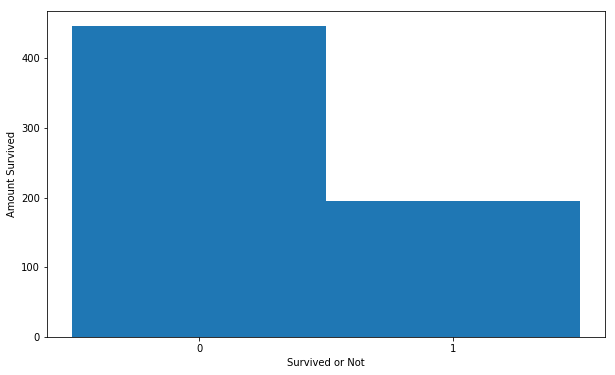

In [46]:
survival(second_third_class_df['Survived'])

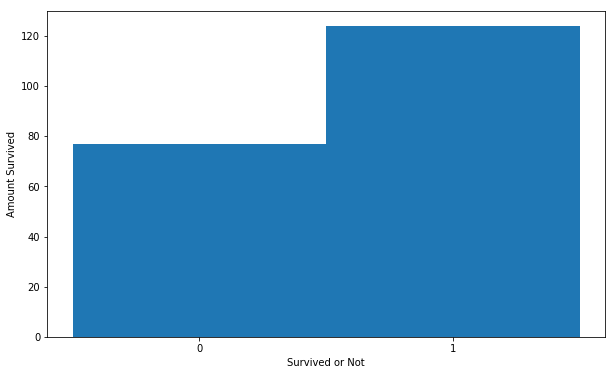

In [47]:
survival(first_class_df['Survived'])

To the surprise of absolutely no one, it seems like First Class passengers were more likely to survive than not, while 2nd and 3rd class passengers were more likely to die than not.  However, don't read too far into these graphs, as these aren't at the same scale, so they aren't fair comparisons.  

Slicing is a useful method for quickly getting DataFrames that contain only the examples we're looking for.  It's a quick, easy method that feels intuitive in Python, since we can rely on the same conditional logic that we would if we were just writing `if/else` statements.  

## Using the `.query()` method

Instead of slicing, you can also make use of the DataFrame's built-in `.query()` method.  This method reads a bit cleaner, and allows us to pass in our arguments as a string.  For more information or example code on how to use this method, see the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.query.html).

In the cell below, use the `.query()` method to slice a DataFrame that contains only passengers who have a `PassengerId` greater than or equal to 500. 

In [48]:
fares_50_to_100_df = df.query("Fare >= 50 & Fare <= 100")
query_string = None
high_passenger_number_df = df.query("PassengerId >= 500")
high_passenger_number_df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
499,499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,NaN,S
500,500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
501,501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
502,502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
503,503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S


Just as with slicing, you can pass in queries with multiple conditions.  One unique difference between using the `.query()` method and conditional slicing is that you can use `and` or `&` as well as `or` or `|` (for fun, try reading this last sentence out loud), while you are limited to the `&` and `|` symbols to denote and/or operations with conditional slicing.  

In the cell below, use the `query()` method to return a DataFrame that contains only female passengers under the age of 15 (exclusive). 

**_Hint_**: Although the entire query is a string, you'll still need to denote that `female` is also a string, within the string.  (String-Ception?)

In [52]:
female_children_df = df.query("Sex == 'female' & Age < 15")
#female_children_df.head()

A cousin of the `query()` method, `eval()` allows you to use the same string-filled syntax as querying for creating new columns.  For instance:

```
some_df.eval('C = A + B')
```

would return a copy of the `some_df` dataframe, but will now include a column `C` where all values are equal to the sum of the `A` and `B` values for any given row.  This method also allows the user to specify if the operation should be done in place or not, providing a quick, easy syntax for simple feature engineering.  

In the cell below, use the DataFrame's `eval()` method in place to add a column called `Age_x_Fare`, and set it equal to `Age` multiplied by `Fare`.  

In [66]:
df = df.eval('Age_Fare=Age*Fare')
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Fare
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,159.5000
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2708.7654
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,206.0500
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1858.5000
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,281.7500


Great! Now, let's move on the coolest part of this lab--querying DataFrames with SQL!

## Querying DataFrames With SQL

For the final section of the lab, you'll make use of the `pandasql` library.  Pandasql is a library designed to make it easy to query DataFrames directly with SQL syntax, which was open-sourced by the company Yhat in late 2016.  It's very straightforward to use, but you are still encouraged to take a look at the [documentation](https://github.com/yhat/pandasql) as needed.  

If you're using the prebuilt virtual environment, you should already have the package ready to import. If not, run the cell below to pip install pandasql so that it is available to import.

In [59]:
!pip install pandasql

You are using pip version 10.0.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


That should have installed everything correctly. This library has a few dependencies, which you should already have installed. If you don't, just `pip install` them in your terminal and you'll be good to go!

In the cell below, import `sqldf` from `pandasql`.

In [71]:
from pandasql import sqldf

Great! Now, it's time get some practice with this handy library.

`pandasql` allows you to pass in SQL queries in the form of a string to directly query our database.  Each time you make a query, you need pass an additional parameter that gives it access to the other variables in the session/environment. You can use a lambda function to pass `locals()` or `globals()` so that you don't have to type this every time.  

In the cell below, create a variable called `pysqldf` and set it equal to a lambda function `q` that returns `sqldf(q, globals())`.  If you're unsure of how to do this, see the example in the [documentation](https://github.com/yhat/pandasql).

In [73]:
# def pysqldf(q):
#     "add this to your script if you get tired of calling locals()"
#     return sqldf(q, globals())
pysqldf = lambda q: sqldf(q, globals())

Great! That will save you from having to pass `globals()` as an argument every time you query, which can get a bit tedious.  

Now write a basic query to get a list of passenger names from `df`, limit 10.  If you would prefer to format your query on multiple lines and style it as canonical SQL, that's fine--remember that multi-line strings in python are denoted by `"""`--for example:
```
"""
This is a 
Multi-Line String
"""
```

In the cell below, write a SQL query that returns the names of the first 10 passengers.

Great! Now, for a harder one:

In the cell below, query the DataFrame for names and fares of any male passengers that survived, limit 30.  

In [81]:
q = "SELECT * FROM df LIMIT 10"  
passenger_names = pysqldf(q)
passenger_names
q2 = """SELECT Name, Fare
        FROM df
        WHERE Sex == 'male' and
        Survived = 1
        LIMIT 30"""

sql_surviving_males = pysqldf(q2)
#sql_surviving_males

This library is really powerful! This makes it easy for us to leverage all of SQL knowledge to quickly query any DataFrame, especially when you only want to select certain columns.  This saves from having to slice/query the DataFrame and then slice the columns you want (or drop the ones you don't want).

Although it's outside the scope of this lab, it's also worth noting that both `pandas` and `pandasql` provide built-in functionality for join operations, too!


## Practical Example: SQL in Pandas

In the cell below, create 2 separate DataFrames using `pandasql`.  One should contain the Pclass of all female passengers that survived, and the other should contain the Pclass of all female passengers that died.  

Then, create histogram visualizations of the `Pclass` column for each DataFrame to compare the two.  Bonus points for taking the time to make the graphs extra readable by adding titles, labeling each axis, and cleaning up the number of ticks on the X-axis! 

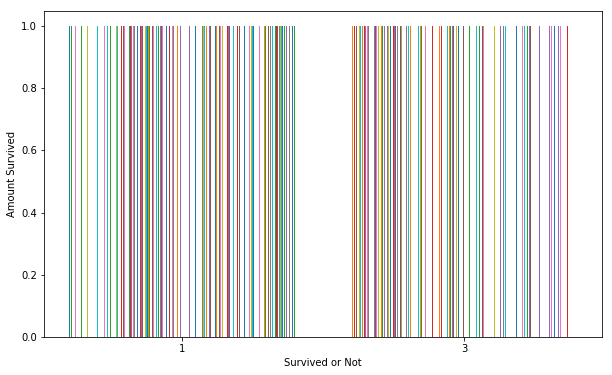

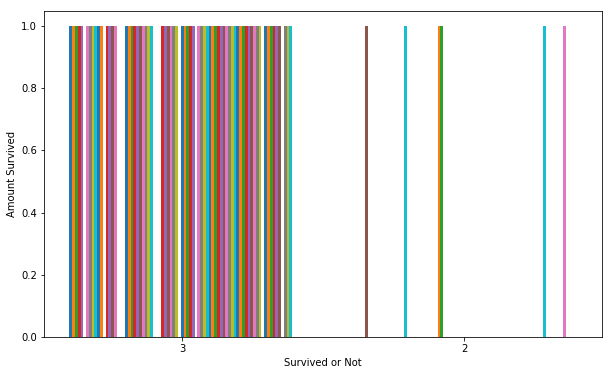

In [83]:
# Write your queries in these variables to keep your code well-formatted and readable
#P class of all  female survivals
q3 = """SELECT Pclass
        FROM df
        WHERE Sex == 'female' and
        Survived = 1
        """
#P class of all females that not survived
q4 = """SELECT Pclass
        FROM df
        WHERE Sex == 'female' and
        Survived = 0
        """

survived_females_by_pclass_df = pysqldf(q3)
died_females_by_pclass_df = pysqldf(q4)

survival(survived_females_by_pclass_df)

survival(died_females_by_pclass_df)
# Create and label the histograms for each below!

## Summary

In this lab, you practiced how to query Pandas DataFrames using SQL.